In [86]:
from numpy import dot
import numpy as np
from matplotlib  import pyplot as plt


## Define Kalman Filter

### Prediction Step

In [109]:
def kf_predict(X, P, A, Q, B, U):
# Input:
#     X = Previous Expected value for the predicted system state
#     P = Previous Predicted covariance of the system state
#     A = system characteristic matrix
#     Q = Expected covariance of the process noise
#     B = input matrix
#     U = input matrix
# Output:
#     X_ = Expected value for the predicted system state
#     P_ = Predicted covariance of the system state

#     X_ = A @ X + B @ U
#     P_ = A @ P @ A.T + Q
    X_ = A * X + B * U
    P_ = (A**2)*P + Q
    return (X_, P_)

### Update Step

In [116]:
def kf_update(X_, P_, Y, C, R):
# Input:
#     X_ = Expected value for the predicted system state
#     P_ = Predicted covariance of the system state
#     Y = Measurement
#     C = Output Matrix of the system
#     R = Covariance of measurement noise
# Output:
#     X = Expected system state
#     P = Expected system covariance
    
#     K = (P_ @ C.T) @ np.linalg.inv(C @ P_ @ C.T + R)
#     X = X_ + K @ (Y - C @ X_)
#     P = P_ - K @ C @ P_

    K = (P_* C) / ((C**2)*P_ + R)
    X = X_ + K * (Y - C * X_)
    P = P_ - K * C * P_
    return (X, P)

### Gauss_pdf

In [117]:
def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - np.tile(M, X.shape[1])
        E = 0.5 * sum(DX * (np.linalg.inv(S) @ DX))
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5*np.log(np.linalg.det(S))
        P = np.exp(-E)
    elif X.shape[1] == 1:
        DX = np.tile(M, X.shape[1]) - M
        E = 0.5 * sum(DX * (np.linalg.inv(S) @ DX))
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5*np.log(np.linalg.det(S))
        P = np.exp(-E)
    else:
        DX = X - M
        E = 0.5 * sum(DX * (np.linalg.inv(S) @ DX))
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5*np.log(np.linalg.det(S))
        P = np.exp(-E)
    
    return (P[0], E[0])

## Example

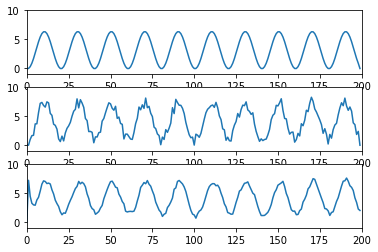

In [142]:
# time step of mobile movement
dt = 0.1

# Initializatino of state matrics

sim_time = 200
time = np.arange(0,sim_time)

X = np.zeros((sim_time))
A = 1.0
B = 1.0
C = 1.0

U = np.zeros((sim_time))
## input sine wave
# frequency
f = 0.05
T = 1/f
for i in range(sim_time):
    U[i] = np.sin(i/T * (2*np.pi))

Y = np.zeros((sim_time))
Y_noise = np.zeros((sim_time))
Y_kalman = np.zeros((sim_time))

# parameters
X_e_init = 10.0
P_e_init = 0.0

X_e = np.zeros((sim_time))
X_e[0] = X_e_init
P_e = np.zeros((sim_time))
P_e[0] = P_e_init

Q = 0.2 # trust process
R = 0.5 # trust measurement


# measurement noise
W = np.random.rand(sim_time) * 2

for i in range(1,sim_time):
    X[i] = A*X[i-1] + B*U[i-1]
    Y[i-1] = C*X[i-1]
    
    
    
    
    Y_noise[i-1] = C*X[i-1] + W[i-1]
    
    x_, p_ = kf_predict(X_e[i-1], P_e[i-1], A, Q, B, U[i-1])
    X_e[i], P_e[i] = kf_update(x_, p_, Y_noise[i-1], C, R)
    Y_kalman[i] = C * X_e[i]

fig = plt.figure()
ax = fig.add_subplot(311)
bx = fig.add_subplot(312)
cx = fig.add_subplot(313)

ax.axis([0, sim_time, -1, 10])
bx.axis([0, sim_time, -1, 10])
cx.axis([0, sim_time, -1, 10])

ax.plot(time, Y)
bx.plot(time, Y_noise)
cx.plot(time, Y_kalman)
